<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DavRo24/blob/main/Ago11-12/Tarea5/Tarea_punto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo
file_path = "/content/drive/MyDrive/Machine-Learning-2023/olympic100m_men.txt"
datos = np.loadtxt(file_path, delimiter=',').T
x = datos[0]
y = datos[1]

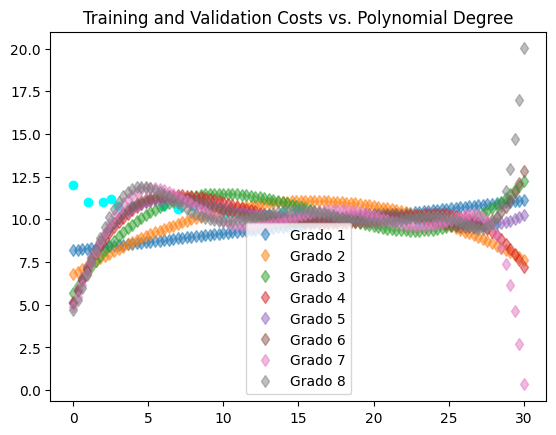

In [18]:
def fit_polynomial(x, y, degree):
    coefficients = np.polyfit(x, y, degree)
    return np.poly1d(coefficients)

def compute_cost(y_true, y_pred):
    squared_errors = (y_true - y_pred) ** 2
    return np.mean(squared_errors)

def w_n(x, y, gradopol, l1):
    X = np.vander(x, gradopol + 1, increasing=True)  # Matriz de Vandermonde
    N = len(x)
    I = np.eye(gradopol + 1)
    X_tXNI = np.dot(X.T, X) + N * l1 * I
    invX_tXNI = np.linalg.inv(X_tXNI)
    X_tt = np.dot(X.T, y)
    w = np.dot(invX_tXNI, X_tt)

    y_pred = np.dot(X, w)
    cost = np.mean((y - y_pred)**2)

    return w, cost


# Normalización de los datos
x_norm = (x - 1896) / 4

gradopol = 8
x_test = np.linspace(0, 30, 100)
plt.scatter(x_norm, y, color='cyan')

l1 = 0.1
for n in range(1, gradopol + 1):
  w_test, cost = w_n(x_norm, y, n, l1)
  f_test = 0
  for i in range(len(w_test)):
    f_test += w_test[i] * x_test**i
  plt.plot(x_test, f_test, 'd', linewidth=2, label=f'Grado {n}', alpha=0.5)

# Crear listas para almacenar los costos
train_costs = []
val_costs = []

# Rango de grados de polinomio
degrees = range(1, gradopol + 1)

for degree in degrees:
    model = fit_polynomial(x_norm, y, degree)
    y_train_pred = model(x_norm)
    y_val_pred = model(x_norm)

    train_cost = compute_cost(y, y_train_pred)
    val_cost = compute_cost(y, y_val_pred)

    train_costs.append(train_cost)
    val_costs.append(val_cost)

# Graficar los costos en conjunto de entrenamiento y validación
#plt.plot(degrees, train_costs, label='Training Cost')
#plt.plot(degrees, val_costs, label='Validation Cost')
#plt.xlabel('Degree of Polynomial')
#plt.ylabel('Cost')
plt.title('Training and Validation Costs vs. Polynomial Degree')
plt.legend()
plt.show()

0.01698138786348981

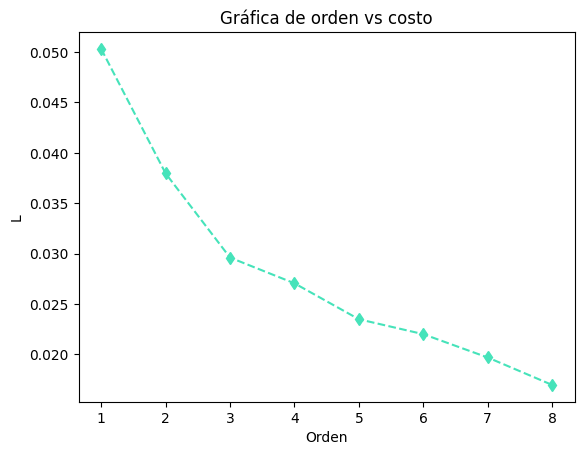

In [10]:
gradopol = 8
gradopol_l = np.arange(1, 9, 1)
x_test = np.linspace(0,30,100)
f_cost = np.ones_like(gradopol_l, dtype = float)
l1 = 0
for n in range(1, gradopol+1):
  w_test,cost = w_n(x_norm,y,n, l1)
  f_cost[n-1] = cost
plt.plot(gradopol_l,f_cost, '--d', color = '#46E3BA')
plt.xlabel('Orden')
plt.ylabel('L')
plt.title('Gráfica de orden vs costo')

cost

Text(0.5, 1.0, 'Gráfica de orden vs costo (regularizado)')

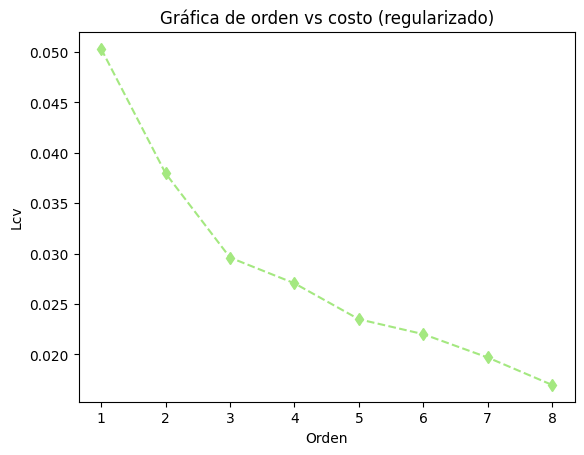

In [16]:
costos = np.zeros(gradopol)
for i in range(len(x_norm)):
  x_l = np.concatenate((x[0:i],x[i+1:]))
  y_l = np.concatenate((y[0:i],y[i+1:]))
  for n in range(1, gradopol+1):
    w_test,cost = w_n(x_norm, y, n, l1)
    f_cost[n-1] = cost
    costos[n-1] += f_cost[n-1]
costos_prom = costos/len(x_norm)

plt.plot(gradopol_l, costos_prom, '--d', color = '#A4E880')
plt.xlabel('Orden')
plt.ylabel('Lcv')
plt.title('Gráfica de orden vs costo (regularizado)')